In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
#import plotly.express as px

df = pd.read_csv("uniqlo_stock_2012-2016.csv", parse_dates=True, index_col="Date")
df.head()

,Open,High,Low,Close,Volume,Stock Trading
Date,,,,,,
2016-12-30,42120,42330,41700,41830,610000,25628028000
2016-12-29,43000,43220,42540,42660,448400,19188227000
2016-12-28,43940,43970,43270,43270,339900,14780670000
2016-12-27,43140,43700,43140,43620,400100,17427993000
2016-12-26,43310,43660,43090,43340,358200,15547803000


In [21]:
import warnings
warnings.filterwarnings('ignore')
#useful to set equal to once

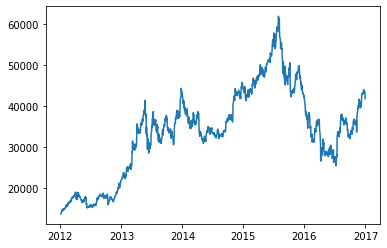

In [22]:
plt.plot(df.index, df['Close'])
#this data is not stationary becasue the ways that is changes are not the same

In [23]:
df.loc['2016-10']

,Open,High,Low,Close,Volume,Stock Trading
Date,,,,,,
2016-10-31,35690,36030,35450,35460,344400,12260234000
2016-10-28,36020,36450,35980,35980,454200,16400925000
2016-10-27,36250,36370,35600,35770,426500,15291775000
2016-10-26,36840,36850,36380,36450,353400,12904237000
2016-10-25,36500,36940,36450,36850,400800,14747028000
2016-10-24,36650,36660,36000,36300,365000,13238639000
2016-10-21,36350,36850,36180,36300,579900,21125073000
2016-10-20,34910,36330,34910,36330,751800,27080028000
2016-10-19,34900,35050,34600,35020,356500,12436404000


In [24]:
#find means for each value for each week
df.resample("W").mean()

,Open,High,Low,Close,Volume,Stock Trading
Date,,,,,,
2012-01-08,13920.0,13973.333333,13696.666667,13790.0,6.120333e+05,8.462075e+09
2012-01-15,14377.5,14630.000000,14230.000000,14567.5,1.019975e+06,1.480215e+10
2012-01-22,14800.0,14908.000000,14702.000000,14794.0,5.475800e+05,8.120263e+09
2012-01-29,14832.0,15010.000000,14772.000000,14948.0,5.902400e+05,8.795512e+09
2012-02-05,15212.0,15330.000000,15090.000000,15256.0,5.479400e+05,8.341651e+09
...,...,...,...,...,...,...
2016-12-04,40556.0,40842.000000,40156.000000,40430.0,6.790200e+05,2.744038e+10
2016-12-11,40818.0,41306.000000,40390.000000,40894.0,8.781800e+05,3.621516e+10
2016-12-18,43434.0,43634.000000,42692.000000,43112.0,5.856000e+05,2.526562e+10


<AxesSubplot:xlabel='Date'>

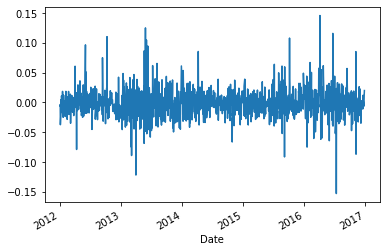

In [25]:
# transform a stationary process
df['Return']=df['Close'].pct_change()
df['Return'].plot()

#this is stationary

## Autocorrelation and Partial Autocorrelation

autocorrelation - how well a time series correlates with a lagged copy of itself as a particular lag interval

ACF - You use the two charts to show the moving average  - number of lags that exceed the confidence interval

PACF = used to esitmate AR order - number of lags...

In [14]:
#df = df.dropna

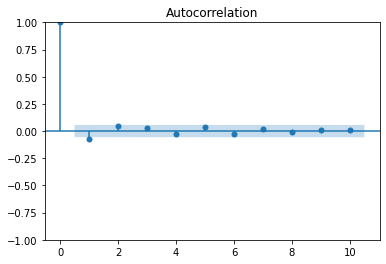

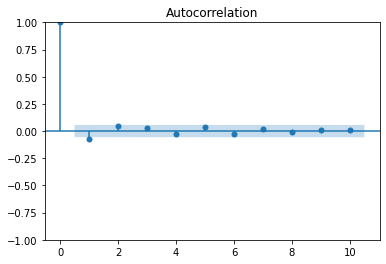

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df[["Return"]], lags = 10, missing='drop')

# x-axis is showing the lags

AttributeError: 'Line2D' object has no property 'missing'

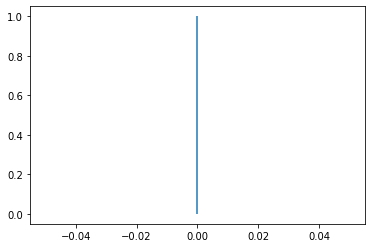

In [37]:
plot_pacf(df[["Return"]], lags = 10, missing='drop')

# ARMA

AR is helping you account for past values whereas the MA is helping you account for past errors.

AR(autoregression) - past valuees are used to predict future ones

MA(moving average) - past and present errors are used to predict future values
- impacts of a random short-term flucuations is decreased

In [35]:
from statsmodels.tsa.arima_model import ARMA

# the first value for order indicates AR lags
#second value for order indicates MA lags

In [36]:
model = ARMA(df['Return'], order = (1,1))

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [28]:
#fit the model to the data
results = model.fit()

NameError: name 'model' is not defined

In [ ]:
from scipy import signal

x = np.arange(1,100,1)
y = np.sin(x/3)
plt.plot(x,y)